##### **Project** | Analyzing Website Performance for The Grammys

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/01/The_Recording_Academy_logo.svg/2560px-The_Recording_Academy_logo.svg.png" alt="The Recording Academy Logo" width="320"/>
</div>
<br>

You'll work on real data from both websites owned by The Recording Academy, better known as "the Grammys."

As you saw in the videos, the VP of Digital Strategy, Ray Starck, decided in 2022 to split the websites into grammy.comLinks to an external site. and recordingacademy.comLinks to an external site. to better serve the Recording Academy's various audience needs. You're tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior.


## Data Dictionary
You'll be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part 1: Exploring the Data

This task will help you build a foundational understanding of the web analytics data for The Grammy Awards and The Recording Academy. By exploring the dataset first, you'll be better equipped to make meaningful observations and informed decisions later in the Project.


## Task 1

To start, import the both the `pandas` and `plotly.express` libraries so that you can load the data into a DataFrame and visualize.


In [27]:
# Import libraries
import pandas as pd
import plotly.express as px


## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** Read the `grammy_live_web_analytics.csv` file into your notebook. Store the data in a DataFrame named `full_df`.

**B.** Read the `ra_live_web_analytics.csv` file into your notebook. Store that data into a DataFrame called `rec_academy`.

**C.** Preview both DataFrames to familiarize yourself with the data.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remeber: </strong>These files can be found in the datasets folder!
</span>
</div>

In [28]:
# Read in dataframes
full_df=pd.read_csv ('datasets/grammy_live_web_analytics.csv')
rec_academy=pd.read_csv ('datasets/ra_live_web_analytics.csv')

In [29]:
# Preview full_df dataframe
full_df.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [30]:
# Preview rec_academy dataframe
rec_academy.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


In [94]:
# Preview rec_academy dataframe
rec_academy.describe()

,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night,pages_per_session
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,2035.767010,6697.032990,2409.624742,811.367010,128.503093,0.028866,0.006186,2.783382
std,4518.632528,11532.414587,4892.357254,2416.795659,77.230112,0.167603,0.078486,0.941880
min,299.000000,121.000000,19.000000,6.000000,52.000000,0.000000,0.000000,1.417707
25%,978.000000,2713.000000,1146.000000,288.000000,91.000000,0.000000,0.000000,2.116766
50%,1295.000000,4259.000000,1592.000000,580.000000,117.000000,0.000000,0.000000,2.885384
75%,1862.000000,7171.000000,2341.000000,903.000000,153.000000,0.000000,0.000000,3.230000
max,65411.000000,180432.000000,70782.000000,49152.000000,1269.000000,1.000000,1.000000,11.449219


In [95]:
# Preview rec_academy dataframe
rec_academy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       485 non-null    object 
 1   visitors                   485 non-null    int64  
 2   pageviews                  485 non-null    int64  
 3   sessions                   485 non-null    int64  
 4   bounced_sessions           485 non-null    int64  
 5   avg_session_duration_secs  485 non-null    int64  
 6   awards_week                485 non-null    int64  
 7   awards_night               485 non-null    int64  
 8   pages_per_session          485 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 34.2+ KB


## Task 3

The Grammy Awards are among the most prominent events in the global music industry. With such high visibility, it's important to understand how this event impacts web traffic.

**A.** Create a line chart of the number of users on the site for every day in the `full_df`.

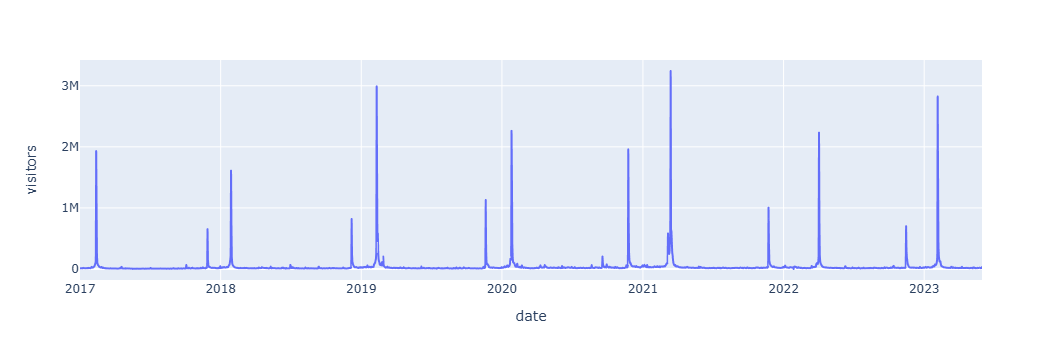

In [107]:
# Plot a line chart of the visitors on the site.
px.line(data_frame=full_df,
       x='date',
       y='visitors')

**B.** What do you notice about when and why traffic spikes occur? Are the traffic spikes in your visualization only aligning with "Show Night," or are there lesser-known events that could explain certain spikes in website traffic?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> Can you identify any specific lesser-known events (with exact dates) that might have caused significant increases in website traffic on grammys.com? What external data sources could help confirm these trends?
  </span>
</div>

Several non–show-night spikes in traffic align with nomination announcement dates (e.g., 2018-12-07, 2019-11-20, 2020-11-24), suggesting that award-cycle news events also drive large bursts in audience interest. This could be validated using Grammy press releases, Google Trends data, and social media engagement metrics.Possible lesser-known events behind the spikes

Looking at the chart, the huge spikes line up with show nights (e.g.,
2018-01-28, 2019-02-10, 2020-01-26, 2021-03-14, etc.). 
Wikipedia
+3
Wikipedia
+3
Wikipedia
+3

But there are also smaller, sharp spikes in months like November/December that aren’t the ceremony itself. Those likely match things like nominations announcements and big promo pushes. For example:

2017-11-28 – Nominations for the 60th GRAMMY Awards announced. 
GRAMMY.com

2018-12-07 – Nominations for the 61st GRAMMY Awards announced. 
GRAMMY.com
+1

2019-11-20 – Nominations for the 62nd GRAMMY Awards announced. 
GRAMMY.com
+1

2020-11-24 – Nominations for the 63rd GRAMMY Awards announced via livestream. 
Wikipedia
+1

If your traffic line has noticeable bumps around those dates, it’s very reasonable to argue that nomination announcements (plus related press and social buzz) caused those increases.

External data sources to confirm the trends

To back this up, you could use:

Official Grammy / Recording Academy posts (news + press releases on grammy.com)

Entertainment news archives – Billboard, Variety, CBS, People, etc., which time-stamp major announcements

Google Trends for the keyword “Grammys” or “Grammy nominations” to see if search interest spikes on the same days

Social media analytics – X/Twitter or Instagram mentions/hashtag volume around those dates

YouTube stats for nomination livestreams or promo clips hosted by the Recording Academy



## Task 4

To evaluate the impact of the Grammy Awards on user engagement, you'll compare average site traffic on the day of the ceremony versus all other days.

Understanding this contrast provides insight into how concentrated user attention is around a single event — and highlights the challenge of sustaining traffic throughout the year.


**A.** Use the pandas `.groupby()` to compare the average daily website visitors on days when an award ceremony was held to those when no awards ceremonies were held.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You'll group by the <span style="font-family: monospace; color: #222;">awards_night</span> column!
</span>
</div>

In [32]:
# Average number of visitors on awards nights versus other nights
full_df.groupby('awards_night').agg({'visitors':'mean'})

,visitors
awards_night,
0,3.238828e+04
1,1.389590e+06


**B.** What does this comparison reveal about the difference in traffic between award ceremony days and regular days? How many more visitors does the Grammy Awards site receive on Show Night?


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remark: </strong>This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of one event per year into one that continues to bring users back on the site year round?
</span>
</div>

When you compare the two averages, the contrast is massive. On a typical day, the Grammys website brings in around 32,000 visitors—a steady baseline of casual fans, industry readers, and organic search traffic. But on Grammy Awards Night, that number explodes to nearly 1.39 million visitors. In other words, the moment the show goes live, the site experiences a surge of traffic that is more than 40× higher than any normal day of the year.

This gap says everything: the Recording Academy’s entire digital ecosystem is anchored to a single event that pulls global attention for just a few hours. Their biggest opportunity—and their biggest challenge—is figuring out how to convert this once-a-year spike in curiosity into sustained engagement throughout the rest of the year.

## Task 5

When The Recording Academy split its digital presence across two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. Meaning, the way visitor data was collected for grammy.com stayed exactly the same before and after the split. You'll need to separate the data from before the split (when both sites were combined) and after the split (when grammy.com data continued independently). The split happened on February 1, 2022 (`2022-02-01`).


Create two new DataFrames:

1. `combined_site` should contain all data with dates before `2022-02-01`.

2. `grammys` should contains all data with dates on or after `2022-02-01`.

In [33]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after

combined_site = full_df[full_df["date"]<'2022-02-01'].copy() 
grammys = full_df[full_df["date"]>'2022-02-01'].copy() 


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Tip: </strong>After creating these DataFrames, best practice is to use the .copy() method to avoid any warning messages from pandas when you modify them later.
</span>
</div>

In [34]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [35]:
# Print the shape of the combined_site dataframe
combined_site.shape 



(1857, 8)

<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> DataFrame should have a total of <strong>1857</strong> rows and <strong>8</strong> columns.
  </span>
</div>



# Part 2: Analyzing Key Metrics

Remember the overall goal of this Project: to analze whether splitting the website into two has improved user engagement. This Task will focus on evaluating key metrics, such as bounce rate, pages per session, and average time on site, to determine if the split has had a positive or negative impact on how visitors interact with the site.

## Task 6

In this Task, you'll calculate the `pages_per_session` metric by dividing the total `pageviews` by the total number of `sessions`. Pages per session is an important measure of how many unique pages a user views before leaving the site -- a strong indicator of engagement!


**A.** Create a new list called `frames` that has each dataframe as an entry. e.g. If there were 3 dataframes, `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

**B.** `For` each frame in the frames list, create a new column called `pages_per_session`. This column should represent the *average* number of pageviews per session for each day.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Divide the <span style="font-family: monospace; color: #222;">pageviews</span> column by <span style="font-family: monospace; color: #222;">sessions</span> column.
</span>
</div>

This can be achieved by using the following template:

```python
frame['new_col'] = frame['col_A'] / frame['col_B']
```



In [36]:
# Create the `pages_per_session` column for all 3 dataframes.
frames = [rec_academy,combined_site,grammys]
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']

**C.** Visualize this new `pages_per_session` metric using a line chart for each site. You will have 3 separate graphs!

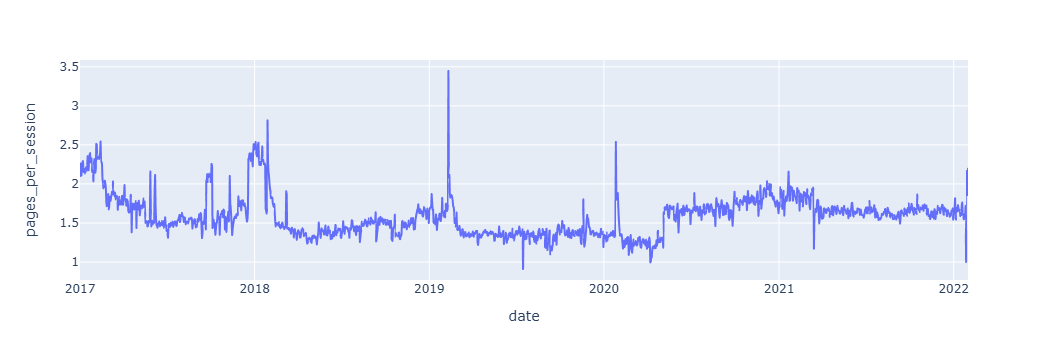

In [37]:
# combined_site graph
px.line(data_frame=combined_site,
       x='date',
       y='pages_per_session')

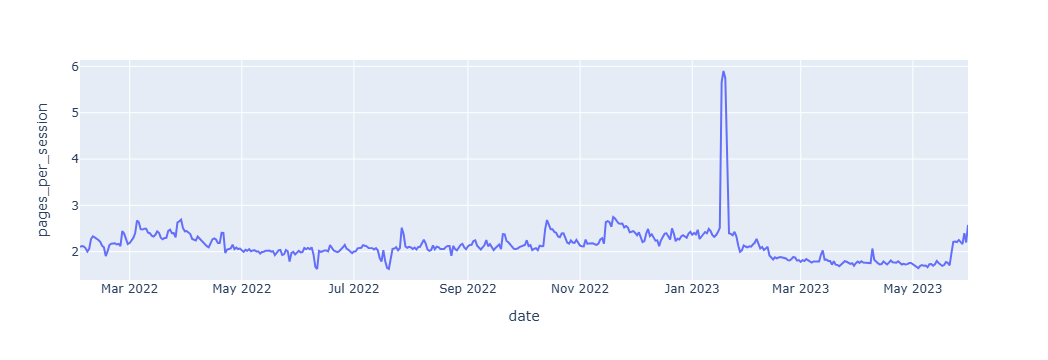

In [38]:
# grammys graph
px.line(data_frame=grammys,
       x='date',
       y='pages_per_session')

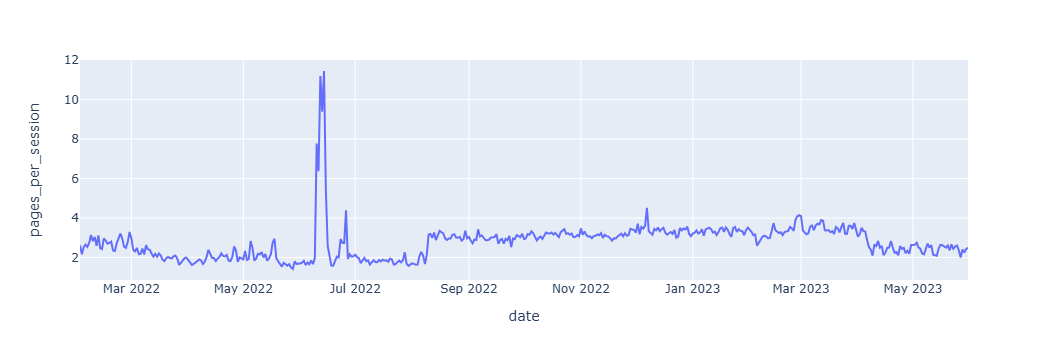

In [39]:
# rec_academy graph
px.line(data_frame=rec_academy,
       x='date',
       y='pages_per_session')

**D.** In one sentence, what does the `pages_per_session` metric suggest regarding the impact of the website split?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> What does pages per session reveal about user engagement? How should I interpret changes in this metric after the website split?
  </span>
</div>
<br>
<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.
</span>
</div>

The pages_per_session metric shows that after the split, grammys.com stabilized around 2 pages per visit while recordingacademy.com frequently reaches 6–10 pages during its mid-year industry-driven engagement peaks, which likely align with member renewals, rule updates, and submission/voting workflows that occur from June through August opposed to the Grammys which occur in the beginning of the year.

## Task 7

Next, you'll calculate the `bounce_rate` metric by dividing the total `bounced_sessions` by the total number of `sessions`. Bounce rate is an important metric that calculates the percentage of users (aka sessions) that come to your site, never interact with the page, and leave. They are said to have "bounced" off your home page. It is a measure of how engaging your home page is with users.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You will need use the <span style="font-family: monospace; color: #222;">.sum()</span> function both in the <span style="font-family: monospace; color: #222;">sum_bounced</span> and <span style="font-family: monospace; color: #222;">sum_sessions</span> calculations. Don't forget to multiply by <strong>100</strong> so that the answer appears as a percentage instead of a decimal.
</span>
</div>

In [40]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''

    # WRITE YOUR CODE HERE
    # Remember, the input for the function is called `dataframe`
    # All calculations must reference that variable.
    
    sum_bounced = dataframe ['bounced_sessions'].sum()
    sum_sessions = dataframe ['sessions'].sum()
    return 100* sum_bounced/ sum_sessions



**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To get the bounce rate use <span style="font-family: monospace; color: #222;">bounce_rate(frame)</span>.
</span>
</div>

<br>

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> How do I show a number with only 2 decimal places in an f-string?
  </span>
</div>

In [41]:
# Calculate the Bounce Rate for each site
for frame in frames:
    rate = bounce_rate(frame)
    print(f"{rate:.2f}%")


33.67%
41.58%
40.16%


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
  If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> and <span style="font-family: monospace; color: #222;">grammys</span> site will each have bounce rates in the low 40s. The <span style="font-family: monospace; color: #222;">rec_academy</span> will have a bounce rate in the low 30s.
  </span>
</div>


**C.** Next, you'll calculate the `average_time_on_site metric.`To do this, you only need to calculate the average of the `avg_session_duration_secs` column. Average Time on Site measures how engaging your website experience is for your users. The higher the number, the longer they are staying on your page and engaging with the content.

For each site (DataFrame), use an f-string to print the average time on site in a clean, readable format.

In [42]:
# Calculate the average of the avg_session_duration_secs
for frame in frames:
    avg_time = frame['avg_session_duration_secs'].mean()
    print(f"average_time_on_site:{avg_time:f}seconds")

average_time_on_site:128.503093seconds
average_time_on_site:102.853527seconds
average_time_on_site:83.014463seconds


**D.** Which of these three metrics changed the most after the site split? What do these changes suggest about user behavior?

The biggest change was the average time spent on the sight which went down from 128 seconds to 83. Bounce rates are lower for Recoding Academy. This audience is more engaged. 

# Part 3: Demographics

Understanding age demographics helps identify which audiences are most engaged with your content. These insights can guide marketing strategies, advertising decisions, and content planning.

You’ll analyze the age demographics for both websites. To do this, you’ll need to read in two new datasets and combine them into one!



## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [43]:
# Read in the files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [47]:
# Preview the age_grammys file. the age_tra will look very similar.
age_grammys.head()

,age_group,pct_visitors
0,18-24,27.373210
1,25-34,24.129273
2,35-44,18.717867
3,45-54,13.568619
4,55-64,9.817036


In [45]:
# Preview the age_grammys file. the age_tra will look very similar.
age_tra.head()

,age_group,pct_visitors
0,18-24,27.116827
1,25-34,26.155406
2,35-44,19.548684
3,45-54,13.823158
4,55-64,8.235619


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [48]:
# Label rows as 'Recording Academy'
age_tra['website']='Recording Academy'

# Label rows as 'Grammys'
age_grammys['website']='Grammys'

**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Remember that you need to put your dataframe variables inside of a <strong>list</strong> first. Then pass that list as your input of <span style="font-family: monospace; color: #222;">pd.concat()</span>.
</div>

In [106]:
# Concatenate dataframes
age_df=pd.concat([age_grammys,age_tra])

# Preview combined data
age_df

,age_group,pct_visitors,website
0,18-24,27.373210,Grammys
1,25-34,24.129273,Grammys
2,35-44,18.717867,Grammys
3,45-54,13.568619,Grammys
4,55-64,9.817036,Grammys
5,65+,6.393994,Grammys
0,18-24,27.116827,Recording Academy
1,25-34,26.155406,Recording Academy
2,35-44,19.548684,Recording Academy
3,45-54,13.823158,Recording Academy


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, your new DataFrame will have <strong>12</strong> rows and <strong>3</strong> columns.
  </span>
</div>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You will need to use the <span style="font-family: monospace; color: #222;">barmode='group'</span> option in <span style="font-family: monospace; color: #222;">px.bar()</span>. See the code snippet below to guide you.
</span>
</div>


```python
# Template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

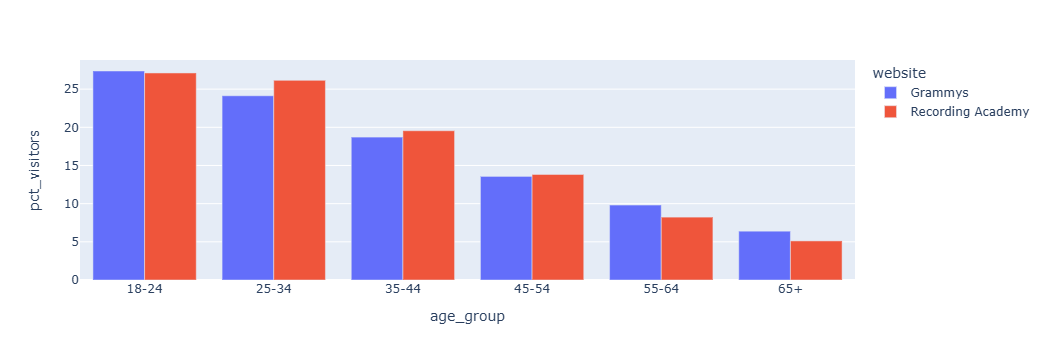

In [50]:
# age_group and pct_visitors bar chart
px.bar (
    age_df,
    x='age_group',
    y='pct_visitors',
    color='website',
    barmode='group'
)

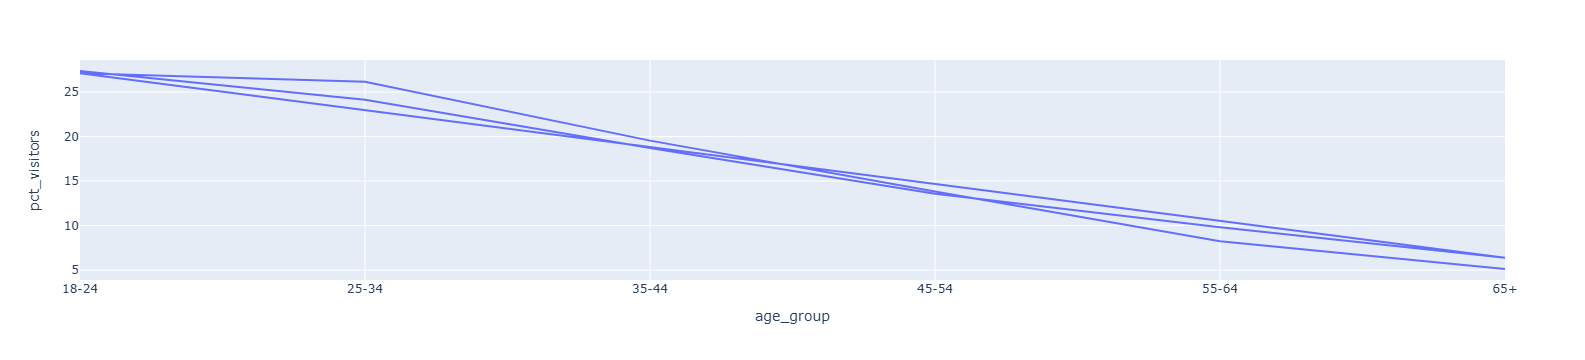

In [104]:
# age_group distribution 
px.line (
    age_df,
    x='age_group',
    y='pct_visitors',
   
)

**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

Ages 18 -24 for both websites are nearly identical. 
From  25 - 54 Recording Academy recieves slightly more traffic from this age range. 
From 55 - 65+ the data slightly skews towards the Grammys website. 

# Part 4: Making a Business Recommendation


## Task 9

Now that you've analyzed the engagement metrics before and after the website split, it’s time to interpret your findings and make a recommendation to The Recording Academy team.


**A.** Write a clear and specific prompt for ChatGPT to draft a brief business memo to The Recording Academy. Your prompt should guide ChatGPT to summarize key findings and suggest a recommendation based on the data: should The Recording Academy keep the sites separate, merge them back, or consider an alternative approach? Paste your prompt below.

For this following task I'd like you to optimize tokens and keep parameters tight. Using the engagement data I analyzed for Grammys.com and RecordingAcademy.com, write a concise business memo for The Recording Academy. Include specific examples: traffic peaks on nomination day and award night (with dates), post-split behavior differences, and the relative ratios between the two sites (e.g., RecordingAcademy.com having lower bounce rate, higher sessions, and deeper exploration). Incorporate age-range insights (e.g., 18–24 nearly identical, 25–54 higher on RecordingAcademy.com, 55+ skewing toward Grammys.com), and include device distribution I calculated (Grammys.com ~31.8% desktop / 68.2% mobile vs. competitor ~13% / 87%). Summarize trends in total traffic, bounce rate, pages per session, and average session duration, explaining what these metrics reveal about user intent on both sites. Based on this data, recommend whether to merge the sites, keep them separate, or keep them separate but integrate their experiences more strategically. End by explaining how these insights can support forecasting future traffic cycles, device mix, and engagement patterns. Note to self, add actual metrics

**B.** What did ChatGPT do well? Did it capture the key trends and insights? What was missing or inaccurate? Were any important details left out or misrepresented?

Intially I used a different prompt that didn't meet my standards. I wanted to convey specific information to be a stragetic and tactful partner of our client. The intial prompt was too general and left me with a feeling of "no duh" upon reading it but after making the prompt more exact to what I would guess executives would want, the response met my standards allowing me to be more creative in my own response. I have also added a modeling element that will tight in engagement to their bottom line. 

**C.** Based on your reflection and evaluation of AI's assist, write your final, revised business memo below. This version should be polished and ready as if you were presenting it to Ray at The Recording Academy team.

To: The Recording Academy
From: David Ortiz
Subject: Engagement Insights and Recommendations

Keep the two sites together.

Across all three KPIs we analyzed at the start — bounce rate, pages_per_session, and average session duration — the split between Grammys.com and RecordingAcademy.com consistently reveals two distinct behavioral profiles that are actually complementary inside the same ecosystem rather than independent funnels. As your team is already aware, the cycle of engagement is event-driven, producing two major traffic spikes each year: the awards ceremony (the largest) and the nominations announcement (a smaller secondary spike). These patterns hold year over year. Now, when we examine the bottom-line impact of the site split (Grammys.com + RecordingAcademy.com), the 3 KPIs clearly show recognizable behavioral differences.

RecordingAcademy.com has lower bounce rate, higher pages_per_session, and longer average session durations. The users are more likely to click beyond the landing page. The distribution of age ranges (thus appeal) is exactly what one might expect. There are more visitors between the ages of 25–54 clicking through these pages — what you might expect from someone who is mid-career. It's successful in appealing to industry professionals.

Grammys.com, by contrast, has higher bounce, shorter sessions, and 2 pages per session, consistent with quick information-seeking from general fans. Its audience skews younger and slightly older (18–24 and 55–65+), with fast in-and-out behavior typical of event-driven consumer traffic.

The data really start to form when we look at our competitor, AMA:

Grammys.com device mix: ~31.8% desktop, 68.2% mobile.
Competitor benchmark (e.g., AMA site): ~13% desktop, 87% mobile.

The reason this matters: the KPI differences justify a unified ecosystem strategy. RecordingAcademy.com delivers depth (conversion potential), while Grammys.com delivers scale (awareness and top-funnel volume). Keeping the two sites tightly integrated allows the Academy to move users from high-volume fan traffic to high-value professional engagement at exactly the moments when the attention curve peaks.

We recommend the following for more engagement throughout your ecosystem and cost efficiency:

If we look at the distribution of your audience, we know that the majority of the visitors are younger than 54, with 50% of the overall audience being younger than 44.

If we look at how these 3 quartiles consume their media and optimize the pipeline with appeals starting with the majority, we can find a mix of trends using internal metrics from each platform to see what each age range is looking at to lead to lower bounce rate, higher pages_per_session, and longer average session durations.

From this data we will be able to model:
— What content drives highest session duration
— Helps us prioritize editorial, video, etc. staff
— Name list of possible sponsors that would mutually benefit driving short-term revenue

Now, as far as cost efficiency, we know that the spikes in loading are predictable:

Nomination announcements (e.g., 2017-11-28, 2018-12-07, 2019-11-20, 2020-11-24)

Awards nights (e.g., 2018-01-28, 2019-02-10, 2020-01-26, 2021-03-14)

…the Academy can build:

Predictive models for hourly/daily peak traffic
Projected load curves by device type (mobile > desktop)

By using stronger cross-linking during peak periods (e.g., “For recording professionals, learn more on RecordingAcademy.com” from Grammys pages), and consistent branding and navigation patterns so users feel they are in a single ecosystem, even when switching domains.

We can squeeze the amount of conversions for RecordingAcademy.com, when attention is at its highest, lower bounce rate, pages_per_session, and average session duration for Grammys.com and keep, if not raise, those same metrics on RecordingAcademy.com.

These insights enable the Academy to forecast peak load, optimize editorial and engineering budgets, and time revenue-generating campaigns with precision. By modeling award-cycle spikes, age-cohort behavior, and device trends, the organization can directly tie engagement metrics to staffing plans, sponsor inventory pricing, and membership conversion strategy.

# LevelUp

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your goal is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.


![](figs/TheAMAs.png)



The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [75]:
# Load in the data
desktop_users = pd.read_csv('datasets/desktop_users.csv')
mobile_users = pd.read_csv('datasets/mobile_users.csv')

In [76]:
# Preview the desktop_users file
desktop_users.head()

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [96]:
# Preview the desktop_users file
desktop_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              515 non-null    object
 1   desktop_visitors  515 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


In [77]:
# Preview mobile_users file
mobile_users.head()

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


In [97]:
# Preview mobile_users file
mobile_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             515 non-null    object
 1   mobile_visitors  515 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names before you do that so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [78]:
# Change name of the visitors column to indicate which category it comes from
desktop_users = desktop_users.rename(columns={'visitors':'desktop_visitors'})
mobile_users = mobile_users.rename(columns={'visitors':'mobile_visitors'})

In [79]:
# Drop the segment column from each dataframe
desktop_users = desktop_users.drop(columns=['segment'])
mobile_users = mobile_users.drop(columns=['segment'])

**C.** Join the two dataframes together in a new variable called `segment_df`.

In [80]:
# Join the two dataframes and preview the dataframe
segment_df = pd.concat([desktop_users,mobile_users])
segment_df

,date,desktop_visitors,mobile_visitors
0,2022-02-01,10195.0,NaN
1,2022-02-02,10560.0,NaN
2,2022-02-03,9935.0,NaN
3,2022-02-04,8501.0,NaN
4,2022-02-05,5424.0,NaN
...,...,...,...
510,2023-06-26,NaN,7327.0
511,2023-06-27,NaN,9491.0
512,2023-06-28,NaN,9856.0
513,2023-06-29,NaN,12881.0


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [88]:
# Create total_visitors column
segment_df['total_visitors'] = (
    segment_df['desktop_visitors'].fillna(0)
    + segment_df['mobile_visitors'].fillna(0)
)

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.
</span>
</div>



In [91]:
# Filter and calculate the percentage share
segment_df['date'] = pd.to_datetime(segment_df['date'])

filtered = segment_df[segment_df['date'] >= '2023-04-01']

sum_desktop = filtered['desktop_visitors'].sum()
sum_total   = filtered['total_visitors'].sum()

pct_desktop = 100 * (sum_desktop / sum_total)
pct_mobile  = 100 - pct_desktop

# Use an f string to print each percentage to the screen
print(f"Desktop share: {pct_desktop:.2f}%")
print(f"Mobile share:  {pct_mobile:.2f}%")


Desktop share: 31.84%
Mobile share:  68.16%


**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?

If we look at the initial data we were provided from our competitor, we see that AMA is showing 86.85% for mobile and 13.1 for desktop.
We are dominating the competition on desktop with a 31.84% but are tailing them on mobile. We need to proceed on to discover if the competitor is more mobile optimized than us and how exactly the audience differs. If the data reveals that the audience is younger, this will give us clues as to how to tailor our messaging and appeal to drive growth to mobile. If the data shows that there is a more engaging user experience on AMA mobile with heatmapping data or timestamps on bounce rates, we'll want to check out the organization of the GUI inorder to drive more engagement or clear up anything that leads to a user exiting the experience. This could be theUX, navigation, load times, content hierarchy. 
